<a href="https://colab.research.google.com/github/Chilese/Hello-Word/blob/main/An%C3%A1lise_Explorat%C3%B3ria_ENEM2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import seaborn as sns

In [2]:
dados_alura = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv")
dados_alura.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [3]:
colunas_selecionadas = ['NU_INSCRICAO', 'TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA', 'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO', 'Q001', 'Q002']
dados_alura = dados_alura.filter(items = colunas_selecionadas)

In [4]:
dados_alura = dados_alura.rename(columns= 
                              {'NU_INSCRICAO': 'Inscrição',
                              'TP_SEXO':'Sexo',
                              'TP_ESCOLA':'Ensino',
                              'TP_COR_RACA':'Raça',
                              'NU_NOTA_CN':'Ciências da Natureza',	
                              'NU_NOTA_CH':'Ciências Humanas',	
                              'NU_NOTA_LC':'Linguagens e Códigos',	
                              'NU_NOTA_MT':'Matemática',	
                              'NU_NOTA_REDACAO':'Redação',
                              'Q001':'Escolaridade_Paterna',
                              'Q002':'Escolaridade_Materna',
                              'Q006':'Renda_Familiar'})

In [5]:
dados_alura['Ensino'] =  dados_alura['Ensino'].map({1: 'Não Respondeu', 2: 'Escola Pública', 3: 'Escola Privada'})
dados_alura['Raça'] = dados_alura['Raça'].map({0: 'Não declarado', 1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indígena'})

In [6]:
q001andq002_dicionario = {
    'A': 'Nunca estudou.',
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade.',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação.',
    'G': 'Completou a Pós-graduação.',
    'H': 'Não sei.'}

In [7]:
dados_alura['Q001'] = [q001andq002_dicionario[resp] for resp in dados_alura.Escolaridade_Paterna]

In [8]:
dados_alura['Q002'] = [q001andq002_dicionario[Resp] for Resp in dados_alura.Escolaridade_Materna]

In [9]:
dados_alura.head()

,Inscrição,Sexo,Raça,Ensino,Ciências da Natureza,Ciências Humanas,Linguagens e Códigos,Matemática,Redação,Escolaridade_Paterna,Escolaridade_Materna,Q001,Q002
0,190001004661,M,Parda,Não Respondeu,435.6,512.3,488.6,432.4,420.0,B,B,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...
1,190001004674,M,Parda,Não Respondeu,NaN,409.3,375.3,NaN,400.0,C,C,"Completou a 4ª série/5º ano, mas não completou...","Completou a 4ª série/5º ano, mas não completou..."
2,190001004722,F,Branca,Não Respondeu,423.2,499.1,441.0,427.2,560.0,C,A,"Completou a 4ª série/5º ano, mas não completou...",Nunca estudou.
3,190001004735,F,Parda,Não Respondeu,426.2,578.1,551.5,499.9,500.0,E,C,"Completou o Ensino Médio, mas não completou a ...","Completou a 4ª série/5º ano, mas não completou..."
4,190001004776,F,Parda,Não Respondeu,516.5,571.3,511.2,424.5,780.0,E,E,"Completou o Ensino Médio, mas não completou a ...","Completou o Ensino Médio, mas não completou a ..."


In [27]:
#Redação pela escolaridade paterna.
dados_alura.filter(items=['Redação', 'Q001'])\
                             .groupby('Q001').mean()\
                             .sort_values(by= 'Redação', ascending= False)

,Redação
Q001,
Completou a Pós-graduação.,694.481798
"Completou a Faculdade, mas não completou a Pós-graduação.",666.182500
"Completou o Ensino Médio, mas não completou a Faculdade.",597.480828
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",566.973559
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",550.778514
Não sei.,528.944662
Não completou a 4ª série/5º ano do Ensino Fundamental.,524.401014
Nunca estudou.,484.716832


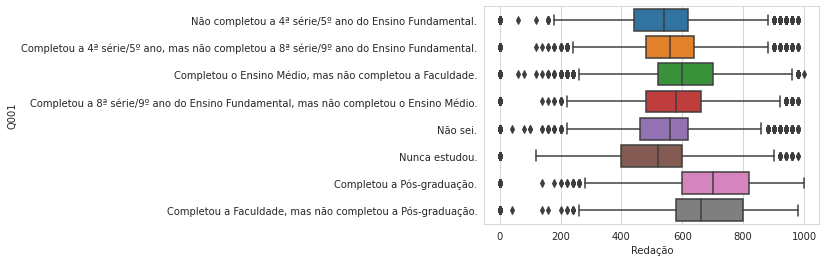

In [37]:
ax_redacao_paterna = sns.boxplot(x= 'Redação', y= 'Q001', data= dados_alura)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


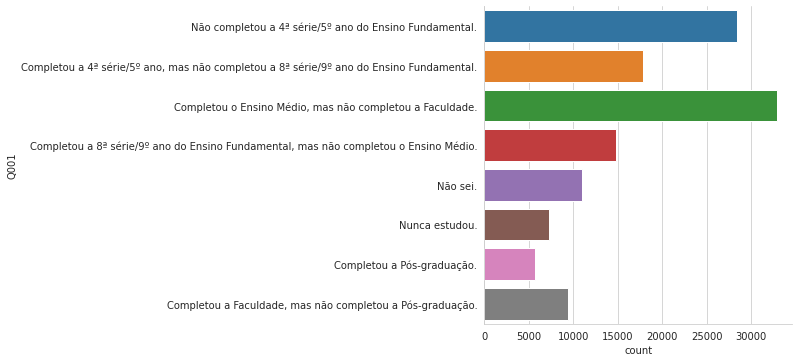

In [64]:
sns.catplot(y= 'Q001', kind="count", data= dados_alura)

In [11]:
#Redação pela escolaridade materna.
dados_alura.filter(items=['Redação', 'Q002'])\
            .groupby('Q002').mean()\
            .sort_values(by= 'Redação', ascending= False)

,Redação
Q002,
Completou a Pós-graduação.,669.617499
"Completou a Faculdade, mas não completou a Pós-graduação.",649.258848
"Completou o Ensino Médio, mas não completou a Faculdade.",583.035725
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.",550.607473
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.",537.094208
Não completou a 4ª série/5º ano do Ensino Fundamental.,514.290375
Não sei.,495.318988
Nunca estudou.,472.634458


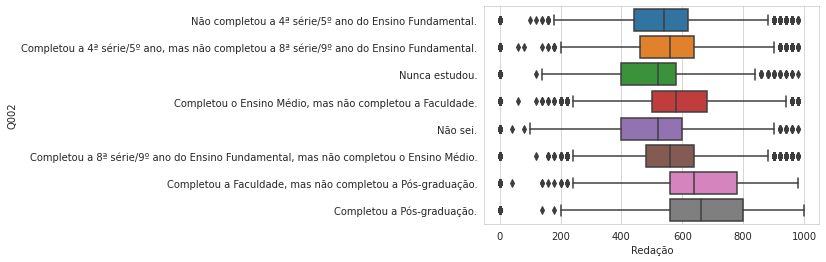

In [35]:
ax_redacao_materna = sns.boxplot(x= 'Redação', y= 'Q002', data= dados_alura)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)


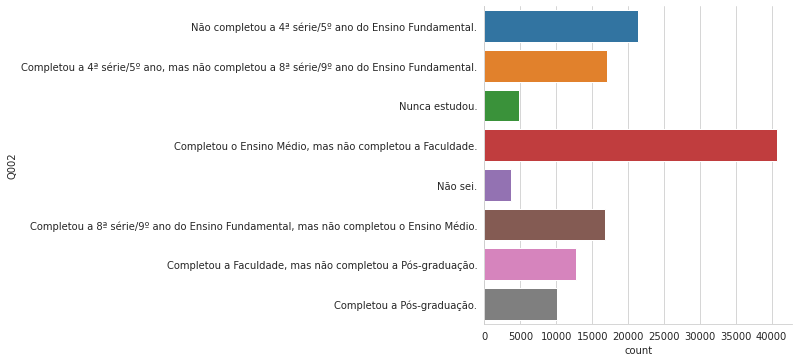

In [60]:
sns.catplot(y= 'Q002', kind="count", data= dados_alura)

# **Correlação das Notas**


A correlação é uma métrica que vai de 1 a -1. Quando a correlação é 1, dizemos que é totalmente correlacionada (relação linear perfeita e positiva), ou seja se uma variável aumenta em 10 a outra também irá aumentar em 10. Quando o valor da correlação é -1, também temos variáveis totalmente correlacionda, só que de maneira negativa (relação linear perfeita negativa), neste caso, se uma variável aumenta em 10 a outra reduz em 10. Agora quando a correlação é 0 temos a inexistência de correlação, ou seja, uma variável não tem influêcia sobre a outra.

In [45]:
dados_alura[['Ensino',	'Ciências da Natureza',	'Ciências Humanas',	'Linguagens e Códigos',	'Matemática',	'Redação']].corr()

,Ciências da Natureza,Ciências Humanas,Linguagens e Códigos,Matemática,Redação
Ciências da Natureza,1.000000,0.669259,0.641998,0.650055,0.504903
Ciências Humanas,0.669259,1.000000,0.748844,0.610570,0.530950
Linguagens e Códigos,0.641998,0.748844,1.000000,0.587986,0.537690
Matemática,0.650055,0.610570,0.587986,1.000000,0.493200
Redação,0.504903,0.530950,0.537690,0.493200,1.000000


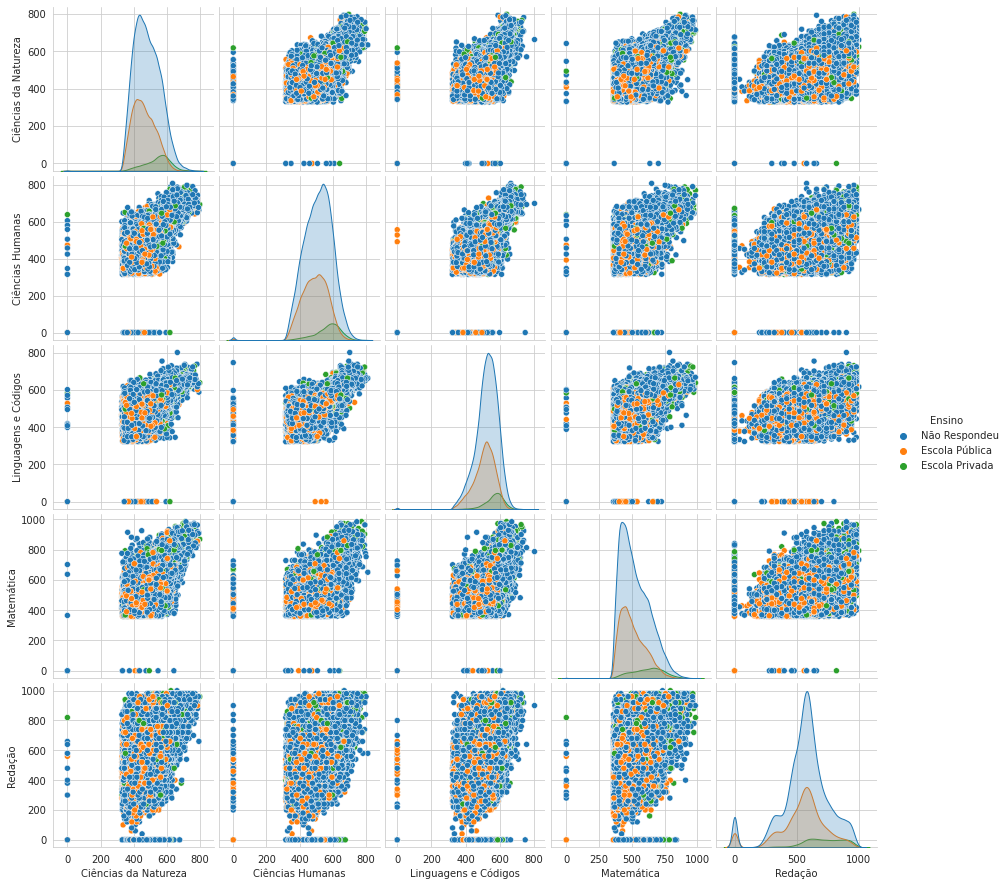

In [65]:
sns.pairplot(hue= 'Ensino', data = dados_alura[['Ensino',	'Ciências da Natureza',	'Ciências Humanas',	'Linguagens e Códigos',	'Matemática',	'Redação']])